In [215]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import pandas as pd
import numpy as np

for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.rc('font', family='Droid Serif') 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
#pd.set_option('display.width', 1000)

In [555]:
# vectors = [64, 128, 512, 1024, 4096, 8192, 16384, 65536, 131072]
# dimensions = [8, 16, 32, 64, 128, 192, 256, 384, 512, 768, 1024]

vectors = [16384]
dimensions = [192]

vectors = [131072]
dimensions = [1024]

for d in dimensions:
    for v in vectors:
        df_nary = pd.read_csv(f'../SAPPHIRE/VTUNE/NARY{v}x{d}.csv', index_col=False)
        df_nary['algorithm'] = 'nary'
        df_nary = df_nary[df_nary['Function'] == 'work']
        
        df_pdx = pd.read_csv(f'../SAPPHIRE/VTUNE/PDX{v}x{d}.csv', index_col=False)
        df_pdx['algorithm'] = 'pdx'
        df_pdx = df_pdx[df_pdx['Function'] == 'work']
        
        df_gather = pd.read_csv(f'../SAPPHIRE/VTUNE/GATHER{v}x{d}.csv', index_col=False)
        df_gather['algorithm'] = 'gather'
        df_gather = df_gather[df_gather['Function'] == 'work']


s = df_gather.iloc[0]
s = s[s.apply(lambda x: not isinstance(x, str))]
s = s[s!=0]
s = s.apply(lambda x: int(x / 1000000 ))
s.sort_values()

# vectors = [65536]
# dimensions = [1024]

# vectors = [8192]
# dimensions = [384]

# vectors = [1024]
# dimensions = [192]

# vectors = [64]
# dimensions = [1024]

# vectors = [131072]
# dimensions = [1024]

Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4                                             4
Hardware Event Count:Total_Latency_FRONTEND_RETIRED.LATENCY_GE_4                              24
Hardware Event Count:MEM_LOAD_RETIRED.L3_HIT                                                  29
Hardware Event Count:L2_RQSTS.RFO_HIT                                                         29
Hardware Event Count:L2_RQSTS.ALL_RFO                                                         29
Hardware Event Count:DTLB_LOAD_MISSES.STLB_HIT:cmask=1                                        29
Hardware Event Count:INT_MISC.UOP_DROPPING                                                    48
Hardware Event Count:Total_Latency_L2_RQSTS.ALL_RFO                                           48
Hardware Event Count:MEM_INST_RETIRED.ALL_STORES                                              58
Hardware Event Count:MEM_LOAD_RETIRED.FB_HIT                                                  67
Hardware Event Count:MEM_LOAD_

In [132]:
for d in dimensions:
    for v in vectors:
        df_nary = pd.read_csv(f'../SAPPHIRE/VTUNE/NARY{v}x{d}.csv', index_col=False)
        df_nary['algorithm'] = 'nary'
        df_nary = df_nary[df_nary['Function'] == 'work']
        
        df_pdx = pd.read_csv(f'../SAPPHIRE/VTUNE/PDX{v}x{d}.csv', index_col=False)
        df_pdx['algorithm'] = 'pdx'
        df_pdx = df_pdx[df_pdx['Function'] == 'work']
        
        df_gather = pd.read_csv(f'../SAPPHIRE/VTUNE/GATHER{v}x{d}.csv', index_col=False)
        df_gather['algorithm'] = 'gather'
        df_gather = df_gather[df_gather['Function'] == 'work']
df = pd.concat([df_nary, df_pdx, df_gather], axis=0)
df = df.select_dtypes(include='number')
df = df.fillna(0)
df
df.loc[4] = df.iloc[2] / df.iloc[1]
#df

In [133]:
columns_with_latency = list(filter(lambda x: "Total_Latency" in x, df.columns))
columns_with_latency = [
    "Hardware Event Count:Total_Latency_CPU_CLK_UNHALTED.THREAD",
    "Hardware Event Count:Total_Latency_CPU_CLK_UNHALTED.THREAD_P",
    "Hardware Event Count:Total_Latency_MEM_INST_RETIRED.ALL_LOADS",
    "Hardware Event Count:Total_Latency_CYCLE_ACTIVITY.CYCLES_MEM_ANY",
    "Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L1_MISS",
    "Hardware Event Count:Total_Latency_MEMORY_ACTIVITY.STALLS_L2_MISS",
    "Hardware Event Count:Total_Latency_MEMORY_ACTIVITY.STALLS_L1D_MISS"
]
df[columns_with_latency]
df['ipc'] = df['Hardware Event Count:INST_RETIRED.ANY'] / df['Hardware Event Count:Total_Latency_CPU_CLK_UNHALTED.THREAD']
df['a'] = df['Hardware Event Count:MEM_INST_RETIRED.ALL_LOADS'] / df['Hardware Event Count:CPU_CLK_UNHALTED.THREAD'] * 100
df['b'] = df['Hardware Event Count:L1D_PEND_MISS.L2_STALLS'] / df['Hardware Event Count:CPU_CLK_UNHALTED.THREAD'] * 100
df['c'] = df['Hardware Event Count:MEMORY_ACTIVITY.STALLS_L1D_MISS'] / df['Hardware Event Count:CPU_CLK_UNHALTED.THREAD'] * 100
df['d'] = df['Hardware Event Count:MEMORY_ACTIVITY.STALLS_L2_MISS'] / df['Hardware Event Count:CPU_CLK_UNHALTED.THREAD'] * 100
df['e'] = df['Hardware Event Count:MEMORY_ACTIVITY.STALLS_L3_MISS'] / df['Hardware Event Count:CPU_CLK_UNHALTED.THREAD'] * 100
df['f'] = df['Hardware Event Count:EXE_ACTIVITY.BOUND_ON_LOADS'] / df['Hardware Event Count:CPU_CLK_UNHALTED.THREAD'] * 100
df[[
    'Hardware Event Count:CPU_CLK_UNHALTED.THREAD', 
    'Hardware Event Count:CYCLE_ACTIVITY.CYCLES_MEM_ANY',
    'Hardware Event Count:Total_Latency_MEM_INST_RETIRED.ALL_LOADS', 
    'a', 'b', 'c', 'd', 'e', 'f', 'ipc'
]]

,Hardware Event Count:CPU_CLK_UNHALTED.THREAD,Hardware Event Count:CYCLE_ACTIVITY.CYCLES_MEM_ANY,Hardware Event Count:Total_Latency_MEM_INST_RETIRED.ALL_LOADS,a,b,c,d,e,f,ipc
0,2.670000e+09,2.518059e+09,7.862724e+09,33.490340,0.000000,11.548082,1.924680,0.0,11.548065,inf
0,2.085000e+09,2.100003e+09,3.980113e+09,24.940756,0.000000,19.184681,7.194255,0.0,23.980815,inf
0,7.800000e+09,7.894043e+09,4.025580e+09,6.600548,6.286067,24.515662,0.628607,0.0,41.487981,0.085526
4,3.741007e+00,3.759063e+00,1.011423e+00,26.464906,inf,127.787696,8.737620,NaN,173.004880,0.000000


In [110]:
df_final['uops_rate_vs_gather'].mean()

3.4212314518199616

In [118]:
df_final['cycles_rate_vs_gather'].mean()

4.263728541319959

In [111]:
df_final['uops_rate_vs_simd'].mean()

4.885845918037222

In [89]:
df[[
    "Hardware Event Count:UOPS_RETIRED.SLOTS", 
    "Hardware Event Count:CPU_CLK_UNHALTED.THREAD"
]]


,Hardware Event Count:UOPS_RETIRED.SLOTS,Hardware Event Count:CPU_CLK_UNHALTED.THREAD
0,1.175376e+11,2.133000e+11
0,3.673158e+10,1.665750e+11
0,1.304526e+11,6.172050e+11
4,3.551511e+00,3.705268e+00


In [36]:
df = df[[
    "Hardware Event Count:CPU_CLK_UNHALTED.THREAD",
    "Hardware Event Count:INST_RETIRED.ANY",
    "Hardware Event Count:Total_Latency_CPU_CLK_UNHALTED.THREAD",
    
    "Hardware Event Count:CYCLE_ACTIVITY.CYCLES_MEM_ANY",
    "Hardware Event Count:Total_Latency_CYCLE_ACTIVITY.CYCLES_MEM_ANY",
    
    "Hardware Event Count:DTLB_LOAD_MISSES.STLB_HIT:cmask=1",
    "Hardware Event Count:DTLB_LOAD_MISSES.WALK_ACTIVE",
    "Hardware Event Count:DTLB_STORE_MISSES.STLB_HIT:cmask=1",
    "Hardware Event Count:DTLB_STORE_MISSES.WALK_ACTIVE",

    "Hardware Event Count:L1D_PEND_MISS.FB_FULL",
    "Hardware Event Count:MEM_LOAD_RETIRED.FB_HIT",
    "Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.FB_HIT",
    
    "Hardware Event Count:L1D_PEND_MISS.L2_STALLS",
    "Hardware Event Count:MEMORY_ACTIVITY.CYCLES_L1D_MISS",
    "Hardware Event Count:MEMORY_ACTIVITY.STALLS_L1D_MISS",
    "Hardware Event Count:MEM_LOAD_RETIRED.L1_HIT",
    "Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L1_HIT",
    "Hardware Event Count:MEM_LOAD_RETIRED.L1_MISS",
    "Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L1_MISS",
    "Hardware Event Count:MEM_LOAD_COMPLETED.L1_MISS_ANY",
    
    "Hardware Event Count:MEM_LOAD_RETIRED.L2_HIT",
    "Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L2_HIT",
    "Hardware Event Count:MEMORY_ACTIVITY.STALLS_L2_MISS",
    "Hardware Event Count:L2_RQSTS.ALL_RFO",
    
    "Hardware Event Count:MEM_LOAD_RETIRED.L3_HIT",
    #"Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L3_HIT",
    "Hardware Event Count:MEM_LOAD_RETIRED.L3_MISS",
    #"Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L3_MISS",
    "Hardware Event Count:MEMORY_ACTIVITY.STALLS_L3_MISS",
    #"Hardware Event Count:Total_Latency_MEM_LOAD_L3_MISS_RETIRED.LOCAL_DRAM",
    
    "Hardware Event Count:MEM_INST_RETIRED.ALL_LOADS",
    "Hardware Event Count:MEM_INST_RETIRED.ALL_STORES",

    "Hardware Event Count:EXE_ACTIVITY.BOUND_ON_LOADS",
    "Hardware Event Count:MEM_INST_RETIRED.SPLIT_LOADS",
    
]]
#df['algorithm'] = ['nary', 'pdx', 'gather', 'gather/pdx']
df

,Hardware Event Count:CPU_CLK_UNHALTED.THREAD,Hardware Event Count:INST_RETIRED.ANY,Hardware Event Count:Total_Latency_CPU_CLK_UNHALTED.THREAD,Hardware Event Count:CYCLE_ACTIVITY.CYCLES_MEM_ANY,Hardware Event Count:Total_Latency_CYCLE_ACTIVITY.CYCLES_MEM_ANY,Hardware Event Count:DTLB_LOAD_MISSES.STLB_HIT:cmask=1,Hardware Event Count:DTLB_LOAD_MISSES.WALK_ACTIVE,Hardware Event Count:DTLB_STORE_MISSES.STLB_HIT:cmask=1,Hardware Event Count:DTLB_STORE_MISSES.WALK_ACTIVE,Hardware Event Count:L1D_PEND_MISS.FB_FULL,Hardware Event Count:MEM_LOAD_RETIRED.FB_HIT,Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.FB_HIT,Hardware Event Count:L1D_PEND_MISS.L2_STALLS,Hardware Event Count:MEMORY_ACTIVITY.CYCLES_L1D_MISS,Hardware Event Count:MEMORY_ACTIVITY.STALLS_L1D_MISS,Hardware Event Count:MEM_LOAD_RETIRED.L1_HIT,Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L1_HIT,Hardware Event Count:MEM_LOAD_RETIRED.L1_MISS,Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L1_MISS,Hardware Event Count:MEM_LOAD_COMPLETED.L1_MISS_ANY,Hardware Event Count:MEM_LOAD_RETIRED.L2_HIT,Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L2_HIT,Hardware Event Count:MEMORY_ACTIVITY.STALLS_L2_MISS,Hardware Event Count:L2_RQSTS.ALL_RFO,Hardware Event Count:MEM_LOAD_RETIRED.L3_HIT,Hardware Event Count:MEM_LOAD_RETIRED.L3_MISS,Hardware Event Count:MEMORY_ACTIVITY.STALLS_L3_MISS,Hardware Event Count:MEM_INST_RETIRED.ALL_LOADS,Hardware Event Count:MEM_INST_RETIRED.ALL_STORES,Hardware Event Count:EXE_ACTIVITY.BOUND_ON_LOADS,Hardware Event Count:MEM_INST_RETIRED.SPLIT_LOADS
0,2.133000e+11,1.302000e+11,9.132000e+10,2.117714e+11,4.835714e+11,3.391535e+07,1.889570e+08,0.000000e+00,9.205595e+07,1.160843e+11,6.536234e+09,8.975330e+10,4.360428e+08,2.094459e+11,1.539716e+11,1.061037e+10,1.520336e+11,1.918611e+09,2.979661e+10,8.430160e+09,7.073668e+08,1.255818e+10,1.538262e+11,9689956.0,3.876738e+07,1.160842e+09,1.073150e+11,1.419600e+10,2.567876e+08,1.533899e+11,1.158936e+10
0,1.665750e+11,3.828000e+10,7.384500e+10,1.659223e+11,3.612590e+11,1.453798e+07,6.009031e+08,1.453798e+07,4.845993e+06,1.420322e+11,7.182048e+09,1.180192e+11,7.801838e+09,1.661646e+11,1.336489e+11,3.004435e+09,4.172287e+10,1.502235e+09,2.779620e+10,8.625635e+09,7.947309e+08,1.013766e+10,1.341335e+11,0.0,2.423432e+07,6.326486e+08,1.103887e+11,8.684019e+09,2.422996e+07,1.319042e+11,1.158192e+10
0,6.172050e+11,7.620000e+10,1.273755e+13,6.166509e+11,3.145761e+13,2.419442e+07,5.298579e+09,4.838885e+06,4.838885e+06,2.715993e+11,4.839078e+06,2.419539e+07,1.075171e+11,6.165541e+11,5.238436e+11,2.177440e+09,1.374206e+10,9.242132e+09,1.206993e+11,1.311302e+11,9.184066e+09,1.237381e+11,4.969401e+10,9677625.0,4.839756e+07,7.261158e+07,2.651637e+10,8.676121e+09,2.903331e+07,5.236492e+11,0.000000e+00
4,3.705268e+00,1.990596e+00,1.724904e+02,3.716503e+00,8.707773e+01,1.664222e+00,8.817693e+00,3.328444e-01,9.985332e-01,1.912237e+00,6.737741e-04,2.050124e-04,1.378100e+01,3.710502e+00,3.919551e+00,7.247419e-01,3.293652e-01,6.152254e+00,4.342297e+00,1.520239e+01,1.155620e+01,1.220578e+01,3.704818e-01,inf,1.997067e+00,1.147740e-01,2.402091e-01,9.990904e-01,1.198240e+00,3.969922e+00,0.000000e+00


/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_49593/749231216.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  }).round(decimals=5).reset_index().groupby(['data_size'], group_keys=False).apply(lambda group: group.assign(**divide_by_first(group)))


Index(['GATHER', 'PDX', 'SIMD'], dtype='object', name='type')
Index(['0.131072', '0.262144', '0.524288', '1.048576', '2.097152', '4.194304',
       '8.388608', '16.777216', '33.554432', '67.108864', '134.217728',
       '268.435456', '536.870912'],
      dtype='object', name='data_size')


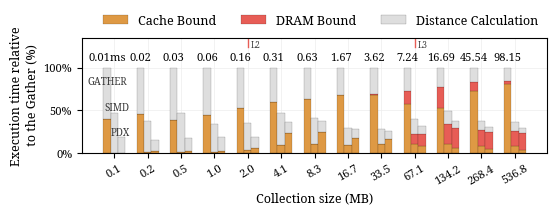

In [573]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogFormatter, FormatStrFormatter

colors = {
            'FAISS-IVF': '#cf9dcd',
            'MILVUS-IVF': '#77b3f5',
            'PDX-ADS': '#59b872',
            'PDX-BSA': '#ccaa74',
            'PDX-BOND': '#5970B8',
        }

dashes = {
            'FAISS-IVF': '',
            'MILVUS-IVF': '',
            'PDX-ADS': '',
            'PDX-BSA': '',
            'PDX-BOND': '',
}

order = [0, 1, 2]

font = {'size': 8}
matplotlib.rc('font', **font)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(6, 1.5)


xticks = [
    '0.131072',
    '0.262144',
    '0.524288',
    '1.048576',
    '2.097152',
    '4.194304',
    '8.388608',
    '16.777216',
    '33.554432',
    '67.108864',
    '134.217728',
    '268.435456',
    '536.870912'
]

def divide_by_first(group):
    return group[['avg runtime']].div(group.iloc[0][['avg runtime']], axis=1)

df['original_avg_runtime'] = df['avg runtime']
df_to_plot = df.groupby(['data_size', 'type']).agg({
    'original_avg_runtime': 'mean',
    'avg runtime': 'mean',
    'Memory Bound': 'mean',
    'L1 Bound': 'mean',
    'L2 Bound': 'mean',
    'L3 Bound': 'mean',
    'DRAM Bound': 'mean',
    'LLC Misses': 'mean',
    'Loads': 'mean',
    'Stores': 'mean',
    'Total Cache Bounds Sum': 'mean'
}).round(decimals=5).reset_index().groupby(['data_size'], group_keys=False).apply(lambda group: group.assign(**divide_by_first(group)))

df_to_plot = df_to_plot.set_index('data_size')
df_to_plot.index = df_to_plot.index.map(str)
df_to_plot['L1 Bound'] = df_to_plot['avg runtime'] * (df_to_plot['L1 Bound'] / 100) 
df_to_plot['L2 Bound'] = df_to_plot['avg runtime'] * (df_to_plot['L2 Bound'] / 100) 
df_to_plot['L3 Bound'] = df_to_plot['avg runtime'] * (df_to_plot['L3 Bound'] / 100) 
df_to_plot['Cache Bound'] = df_to_plot['L1 Bound'] 
df_to_plot['DRAM Bound'] = df_to_plot['avg runtime'] * (df_to_plot['DRAM Bound'] / 100) 
df_to_plot['Left runtime'] = df_to_plot['avg runtime'] - (df_to_plot['L1 Bound'] + df_to_plot['L2 Bound'] + df_to_plot['L3 Bound'] + df_to_plot['DRAM Bound'])
df_to_plot = df_to_plot.loc[xticks]


cols = ['L1 Bound', 'L2 Bound', 'L3 Bound', 'DRAM Bound', 'Left runtime']
labels = ['L1 Bound', 'L2 Bound', 'L3 Bound', 'DRAM Bound', 'Distance Calculation']

tmp = df_to_plot.reset_index()
tmp['data_size'] = tmp['data_size'].astype(str)
pivot_df = tmp.reset_index().pivot(index='data_size', columns='type', values=cols)
pivot_df = pivot_df.loc[xticks] # to reorder correctly
categories = pivot_df.index
groups = pivot_df.columns.levels[1]

print(groups)
print(categories)

bar_width = 0.25
bar_positions = list(range(len(categories)))
group_offsets = [-bar_width, 0, bar_width]  # Adjust based on number of groups

original_avg_runtime = tmp[tmp['type'] == 'GATHER']['original_avg_runtime']
original_avg_runtime = np.round(original_avg_runtime, 2)
original_avg_runtime = original_avg_runtime.astype(str)
original_avg_runtime[0] = original_avg_runtime[0] + "ms"

# Plot each group with stacking
colors = ['#eacaaa', '#de9944', '#e37f32', '#e75d56', '#dedede']
for i, group in enumerate(['GATHER', 'SIMD', 'PDX']):
    bottom = None
    for j, subcategory in enumerate(cols):
        ax1.bar(
            [pos + group_offsets[i] for pos in bar_positions],
            pivot_df[subcategory][group],
            bar_width,
            bottom=bottom,
            label=f'{group} - {subcategory}' if i == 0 else "",
            color=colors[j]
        )
        bottom = pivot_df[subcategory][group] if bottom is None else bottom + pivot_df[subcategory][group]

ax1.xaxis.grid(linewidth=0.5, color='#ededed', zorder=-1)
ax1.yaxis.grid(linewidth=0.5, color='#ededed', zorder=-1)
ax1.set_axisbelow(True)

ax1.set_yticks([0.0, 0.5, 1.0])
ax1.set_yticklabels(labels=["0%", "50%", "100%"])

ax1.set_xticks(list(range(len(xticks))))
ax1.set_xticklabels(labels=[x.split('.')[0] + '.' + x.split('.')[1][:1] for x in xticks])

ax1.tick_params(axis='x', labelrotation=0, labelsize=8)
ax1.set_xlabel("Collection size (MB)", fontsize=9)
ax1.set_ylabel("Execution time relative\n to the Gather (%)", fontsize=9)
ax1.tick_params(axis='y', labelrotation=0, labelsize=8)


ax1.bar_label(ax1.containers[4], original_avg_runtime, rotation=0, padding=3)

handles, _ = ax1.get_legend_handles_labels()
ax1.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order],
    loc="upper left",
    prop={'size': 9},
    ncols=len(order),
    frameon=False,
    # bbox_to_anchor=(2.60, 1.60), # for when 4 are plotted
    bbox_to_anchor=(0.05, 1.3),
)
ax1.set_ylim(0, 1.3)
ax1.annotate(
    'L2', # El texto
    xy = (4.1, 0.6),
    xytext = (4.1, 0.6),
    size=7, 
    color='#383838',
    horizontalalignment='left',
    verticalalignment='top'
)
ax1.axvline(
    4, # Punto en el Eje Y donde quiero trazar mi linea horizontal
    linestyle='dashed',
    color='#e75d56',
    alpha=1,
    linewidth=0.7,
    zorder=0
)
ax1.annotate(
    'L3', # El texto
    xy = (9.1, 0.6),
    xytext = (9.1, 0.6),
    size=7, 
    color='#383838',
    horizontalalignment='left',
    verticalalignment='top'
)
ax1.axvline(
    9,
    linestyle='dashed',
    color='#e75d56',
    alpha=1,
    linewidth=0.7,
    zorder=0,
)

ax1.annotate(
    'GATHER', # El texto
    xy = (-0.9, 0.9),
    xytext = (-0.9, 0.9),
    size=8, 
    color='#383838',
    horizontalalignment='left',
    verticalalignment='top'
)
ax1.annotate(
    'SIMD', # El texto
    xy = (-0.5, 0.6),
    xytext = (-0.5, 0.6),
    size=8, 
    color='#383838',
    horizontalalignment='left',
    verticalalignment='top'
)
ax1.annotate(
    'PDX', # El texto
    xy = (-0.15, 0.3),
    xytext = (-0.15, 0.3),
    size=8, 
    color='#383838',
    horizontalalignment='left',
    verticalalignment='top'
)

/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_49593/749231216.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  }).round(decimals=5).reset_index().groupby(['data_size'], group_keys=False).apply(lambda group: group.assign(**divide_by_first(group)))


Index(['GATHER', 'PDX', 'SIMD'], dtype='object', name='type')
Index(['0.131072', '0.262144', '0.524288', '1.048576', '2.097152', '4.194304',
       '8.388608', '16.777216', '33.554432', '67.108864', '134.217728',
       '268.435456', '536.870912'],
      dtype='object', name='data_size')


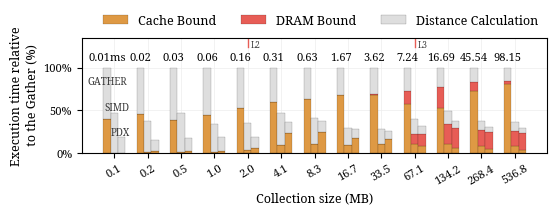

In [574]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogFormatter, FormatStrFormatter

colors = {
            'FAISS-IVF': '#cf9dcd',
            'MILVUS-IVF': '#77b3f5',
            'PDX-ADS': '#59b872',
            'PDX-BSA': '#ccaa74',
            'PDX-BOND': '#5970B8',
        }

dashes = {
            'FAISS-IVF': '',
            'MILVUS-IVF': '',
            'PDX-ADS': '',
            'PDX-BSA': '',
            'PDX-BOND': '',
}

order = [0, 1, 2]

font = {'size': 8}
matplotlib.rc('font', **font)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(6, 1.5)


xticks = [
    '0.131072',
    '0.262144',
    '0.524288',
    '1.048576',
    '2.097152',
    '4.194304',
    '8.388608',
    '16.777216',
    '33.554432',
    '67.108864',
    '134.217728',
    '268.435456',
    '536.870912'
]

def divide_by_first(group):
    return group[['avg runtime']].div(group.iloc[0][['avg runtime']], axis=1)

df['original_avg_runtime'] = df['avg runtime']
df_to_plot = df.groupby(['data_size', 'type']).agg({
    'original_avg_runtime': 'mean',
    'avg runtime': 'mean',
    'Memory Bound': 'mean',
    'L1 Bound': 'mean',
    'L2 Bound': 'mean',
    'L3 Bound': 'mean',
    'DRAM Bound': 'mean',
    'LLC Misses': 'mean',
    'Loads': 'mean',
    'Stores': 'mean',
    'Total Cache Bounds Sum': 'mean'
}).round(decimals=5).reset_index().groupby(['data_size'], group_keys=False).apply(lambda group: group.assign(**divide_by_first(group)))

df_to_plot = df_to_plot.set_index('data_size')
df_to_plot.index = df_to_plot.index.map(str)
df_to_plot['L1 Bound'] = df_to_plot['avg runtime'] * (df_to_plot['L1 Bound'] / 100) 
df_to_plot['L2 Bound'] = df_to_plot['avg runtime'] * (df_to_plot['L2 Bound'] / 100) 
df_to_plot['L3 Bound'] = df_to_plot['avg runtime'] * (df_to_plot['L3 Bound'] / 100) 
df_to_plot['Cache Bound'] = df_to_plot['L1 Bound'] +  df_to_plot['L2 Bound'] + df_to_plot['L3 Bound']
df_to_plot['DRAM Bound'] = df_to_plot['avg runtime'] * (df_to_plot['DRAM Bound'] / 100) 
df_to_plot['Left runtime'] = df_to_plot['avg runtime'] - (df_to_plot['L1 Bound'] + df_to_plot['L2 Bound'] + df_to_plot['L3 Bound'] + df_to_plot['DRAM Bound'])
df_to_plot = df_to_plot.loc[xticks]


cols = ['Cache Bound', 'DRAM Bound', 'Left runtime']
labels = ['Cache Bound', 'DRAM Bound', 'Distance Calculation']

tmp = df_to_plot.reset_index()
tmp['data_size'] = tmp['data_size'].astype(str)
pivot_df = tmp.reset_index().pivot(index='data_size', columns='type', values=cols)
pivot_df = pivot_df.loc[xticks] # to reorder correctly
categories = pivot_df.index
groups = pivot_df.columns.levels[1]

print(groups)
print(categories)

bar_width = 0.22
bar_positions = list(range(len(categories)))
group_offsets = [-bar_width, 0, bar_width]  # Adjust based on number of groups

original_avg_runtime = tmp[tmp['type'] == 'GATHER']['original_avg_runtime']
original_avg_runtime = np.round(original_avg_runtime, 2)
original_avg_runtime = original_avg_runtime.astype(str)
original_avg_runtime[0] = original_avg_runtime[0] + "ms"

# Plot each group with stacking
colors = ['#eacaaa', '#de9944', '#e37f32', '#e75d56', '#dedede']
colors = [ '#de9944', '#e75d56', '#dedede']
for i, group in enumerate(['GATHER', 'SIMD', 'PDX']):
    bottom = None
    for j, subcategory in enumerate(cols):
        ax1.bar(
            [pos + group_offsets[i] for pos in bar_positions],
            pivot_df[subcategory][group],
            bar_width,
            bottom=bottom,
            label=f'{group} - {subcategory}' if i == 0 else "",
            color=colors[j],
            linewidth=0.1,
            edgecolor='black',
            zorder=1
        )
        bottom = pivot_df[subcategory][group] if bottom is None else bottom + pivot_df[subcategory][group]

ax1.xaxis.grid(linewidth=0.5, color='#ededed', zorder=-3)
ax1.yaxis.grid(linewidth=0.5, color='#ededed', zorder=-3)
ax1.set_axisbelow(True)

ax1.set_yticks([0.0, 0.5, 1.0])
ax1.set_yticklabels(labels=["0%", "50%", "100%"])

ax1.set_xticks(list(range(len(xticks))))
ax1.set_xticklabels(labels=[x.split('.')[0] + '.' + x.split('.')[1][:1] for x in xticks])

ax1.tick_params(axis='x', labelrotation=30, labelsize=8)
ax1.set_xlabel("Collection size (MB)", fontsize=9)
ax1.set_ylabel("Execution time relative\n to the Gather (%)", fontsize=9)
ax1.tick_params(axis='y', labelrotation=0, labelsize=8)


ax1.bar_label(ax1.containers[2], original_avg_runtime, rotation=0, padding=3)

handles, _ = ax1.get_legend_handles_labels()
ax1.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order],
    loc="upper left",
    prop={'size': 9},
    ncols=len(order),
    frameon=False,
    # bbox_to_anchor=(2.60, 1.60), # for when 4 are plotted
    bbox_to_anchor=(0.02, 1.3),
)
ax1.set_ylim(0, 1.35)
ax1.annotate(
    'L2', # El texto
    xy = (4.1, 1.32),
    xytext = (4.1, 1.32),
    size=6, 
    color='#383838',
    horizontalalignment='left',
    verticalalignment='top'
)
ax1.axvline(
    4, # Punto en el Eje Y donde quiero trazar mi linea horizontal
    linestyle='solid',
    ymin=0.92,
    ymax=1,
    color='#e75d56',
    alpha=1,
    linewidth=1.0,
    zorder=1
)
ax1.annotate(
    'L3', # El texto
    xy = (9.1, 1.32),
    xytext = (9.1, 1.32),
    size=6, 
    color='#383838',
    horizontalalignment='left',
    verticalalignment='top'
)
ax1.axvline(
    9,
    linestyle='solid',
    ymin=0.92,
    ymax=1,
    color='#e75d56',
    alpha=1,
    linewidth=1.0,
    zorder=1,
)

ax1.annotate(
    'GATHER', # El texto
    xy = (-0.8, 0.9),
    xytext = (-0.8, 0.9),
    size=7, 
    color='#383838',
    horizontalalignment='left',
    verticalalignment='top'
)
ax1.annotate(
    'SIMD', # El texto
    xy = (-0.3, 0.6),
    xytext = (-0.3, 0.6),
    size=7, 
    color='#383838',
    horizontalalignment='left',
    verticalalignment='top'
)
ax1.annotate(
    'PDX', # El texto
    xy = (-0.1, 0.3),
    xytext = (-0.1, 0.3),
    size=7, 
    color='#383838',
    horizontalalignment='left',
    verticalalignment='top'
)
plt.savefig(f'../figures/GATHER_INTEL.png', format='png', dpi=600, bbox_inches='tight')

In [539]:
final_df = {
    'uops_rate_vs_gather': [],
    'uops_rate_vs_simd': [],
    'cycles_rate_vs_gather': [],
    'cycles_rate_vs_simd': [],
    'dataset': [],
    'cycles_per_uops_gather': [],
    'cycles_per_uops_simd': [],
    'cycles_per_uops_pdx': [],
    'data_size': []
}
vectors = [64, 128, 512, 1024, 4096, 8192, 16384, 65536, 131072]
dimensions = [8, 16, 32, 64, 128, 192, 256, 384, 512, 768, 1024]
for v in vectors:
    for d in dimensions:
        df_nary = pd.read_csv(f'../SAPPHIRE/VTUNE/NARY{v}x{d}.csv', index_col=False)
        df_nary['algorithm'] = 'nary'
        df_nary = df_nary[df_nary['Function'] == 'work']
        
        df_pdx = pd.read_csv(f'../SAPPHIRE/VTUNE/PDX{v}x{d}.csv', index_col=False)
        df_pdx['algorithm'] = 'pdx'
        df_pdx = df_pdx[df_pdx['Function'] == 'work']
        
        df_gather = pd.read_csv(f'../SAPPHIRE/VTUNE/GATHER{v}x{d}.csv', index_col=False)
        df_gather['algorithm'] = 'gather'
        df_gather = df_gather[df_gather['Function'] == 'work']

        df_tmp = pd.concat([df_nary, df_pdx, df_gather], axis=0)
        df_tmp['cycles_per_uops'] = df_tmp["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"] / df_tmp["Hardware Event Count:UOPS_RETIRED.SLOTS"]
        try:
            df_tmp = df_tmp[[
                "Hardware Event Count:CPU_CLK_UNHALTED.THREAD", 
                "Hardware Event Count:UOPS_RETIRED.SLOTS", 
                'cycles_per_uops', "Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L1_HIT",
                "Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L2_HIT",
                'Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L3_HIT',
                #"Hardware Event Count:Total_Latency_MEM_LOAD_L3_MISS_RETIRED.LOCAL_DRAM"
            ]]
        except:
            continue
        df_tmp.loc[4] = df_tmp.iloc[2] / df_tmp.iloc[1]
        df_tmp.loc[5] = df_tmp.iloc[0] / df_tmp.iloc[1]

        try:
            df_tmp['l1_hits'] = df_tmp["Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L1_HIT"] / df_tmp["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"] * 100
            df_tmp['l2_hits'] = df_tmp["Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L2_HIT"] / df_tmp["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"] * 100
            df_tmp['l3_hits'] = df_tmp["Hardware Event Count:Total_Latency_MEM_LOAD_RETIRED.L3_HIT"] / df_tmp["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"] * 100
            #df_tmp['dram'] = df_tmp["Hardware Event Count:Total_Latency_MEM_LOAD_L3_MISS_RETIRED.LOCAL_DRAM"] / df_tmp["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"]
            
            print(v,d,'simd', df_tmp['l1_hits'].iloc[0], df_tmp['l2_hits'].iloc[0], df_tmp['l3_hits'].iloc[0])
            print(v,d,'pdx', df_tmp['l1_hits'].iloc[1], df_tmp['l2_hits'].iloc[1], df_tmp['l3_hits'].iloc[1])
            print(v,d,'gather', df_tmp['l1_hits'].iloc[2], df_tmp['l2_hits'].iloc[2], df_tmp['l3_hits'].iloc[2])
            print()

        ==> counter
        3.9 ghz
        --> total cycles: 3915000000 
        --> l1 hits:      17614311840
        --> loads:        763307376
                          6930000000
        1.4 seconds
        
        ==> real time 
        1.145 seconds
        
        
        except:
            continue
        
        final_df['cycles_rate_vs_gather'].append(df_tmp.loc[4]["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"])
        final_df['cycles_rate_vs_simd'].append(df_tmp.loc[5]["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"])
        final_df['uops_rate_vs_gather'].append(df_tmp.loc[4]["Hardware Event Count:UOPS_RETIRED.SLOTS"])
        final_df['uops_rate_vs_simd'].append(df_tmp.loc[5]["Hardware Event Count:UOPS_RETIRED.SLOTS"])
        final_df['cycles_per_uops_pdx'].append(df_tmp.iloc[1]['cycles_per_uops'])
        final_df['cycles_per_uops_simd'].append(df_tmp.iloc[0]['cycles_per_uops'])
        final_df['cycles_per_uops_gather'].append(df_tmp.iloc[2]['cycles_per_uops'])
        final_df['data_size'].append(v * d)
        final_df['dataset'].append(f"{v}x{d}")
df_final = pd.DataFrame(final_df)
df_final.replace([np.inf, -np.inf, 0], np.nan, inplace=True)
df_final.dropna(inplace=True)
# df_final

512 768 simd 134.56471679999999 30.235890533333333 1.6616366666666667
512 768 pdx 95.23823649635037 16.66689099756691 nan
512 768 gather 2.31349671972986 39.70007803183792 0.23139753979739508

512 1024 simd 301.1571067857143 104.16617399999998 13.11190407142857
512 1024 pdx 77.05639111111111 13.485030505050505 2.408510606060606
512 1024 gather 1.5960099541584807 25.15341669941061 0.0532113403187077

1024 512 simd 111.8661095410628 22.373489009661835 3.533344927536232
1024 512 pdx 49.923855208333336 53.918409374999996 1.8725320312500002
1024 512 gather 2.0392771798080935 20.692113842302877 1.3869954609929078

1024 768 simd 197.08946340495868 2.6925112947658403 31.939411272727273
1024 768 pdx 59.76045431726907 4.44504578313253 8.49663248995984
1024 768 gather 20.251756233846155 38.836185403076925 0.7943507692307693

1024 1024 simd 122.74441707025412 6.609393931240658 15.182775321375185
1024 1024 pdx 42.926010408314774 23.15867964365256 9.27249322197476
1024 1024 gather 2.210723332278147 

/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_49593/1373804946.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp['cycles_per_uops'] = df_tmp["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"] / df_tmp["Hardware Event Count:UOPS_RETIRED.SLOTS"]
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_49593/1373804946.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp['cycles_per_uops'] = df_tmp["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"] / df_tmp["Hardware Event Count:UOPS_RETIRED.SLOTS"]
/var/f

8192 1024 simd 181.2361560352633 2.0673221110316895 23.996740086728614
8192 1024 pdx 37.09195556100886 16.385776003635538 11.125488468984322
8192 1024 gather 8.581455400663822 23.526494210526316 0.15263334400189663

16384 64 simd 116.27924186046512 7.752041860465115 7.753553488372093
16384 64 pdx 18.043181597222222 nan 3.609383333333333
16384 64 gather 25.268854838709675 nan 0.8424693548387097

16384 128 simd 421.51411423868313 nan 44.206737777777775
16384 128 pdx 18.82718851851852 3.7654825925925928 17.136287518518518
16384 128 gather 166.2884742164502 11.525081212121211 8.23380606060606

16384 192 simd 449.9185655172414 nan 47.50123269476373
16384 192 pdx 18.83876119402985 3.7677973880597015 3.7685320895522385
16384 192 gather 70.32917937282231 1.7015327526132404 6.013254425087108

16384 256 simd 455.043415308642 15.419010560303894 42.31651282051282
16384 256 pdx 74.81909450228311 3.649755616438356 9.308691397260274
16384 256 gather 5.142969394261424 43.132885129295076 3.875172284803

/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_49593/1373804946.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp['cycles_per_uops'] = df_tmp["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"] / df_tmp["Hardware Event Count:UOPS_RETIRED.SLOTS"]
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_49593/1373804946.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp['cycles_per_uops'] = df_tmp["Hardware Event Count:CPU_CLK_UNHALTED.THREAD"] / df_tmp["Hardware Event Count:UOPS_RETIRED.SLOTS"]
/var/f